In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
df = pd.read_pickle('all_banks')

In [10]:
#** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [11]:
#** What is the max Close price for each bank's stock throughout the time period?**
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [12]:
#** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock**
returns = pd.DataFrame()

In [13]:
#**Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

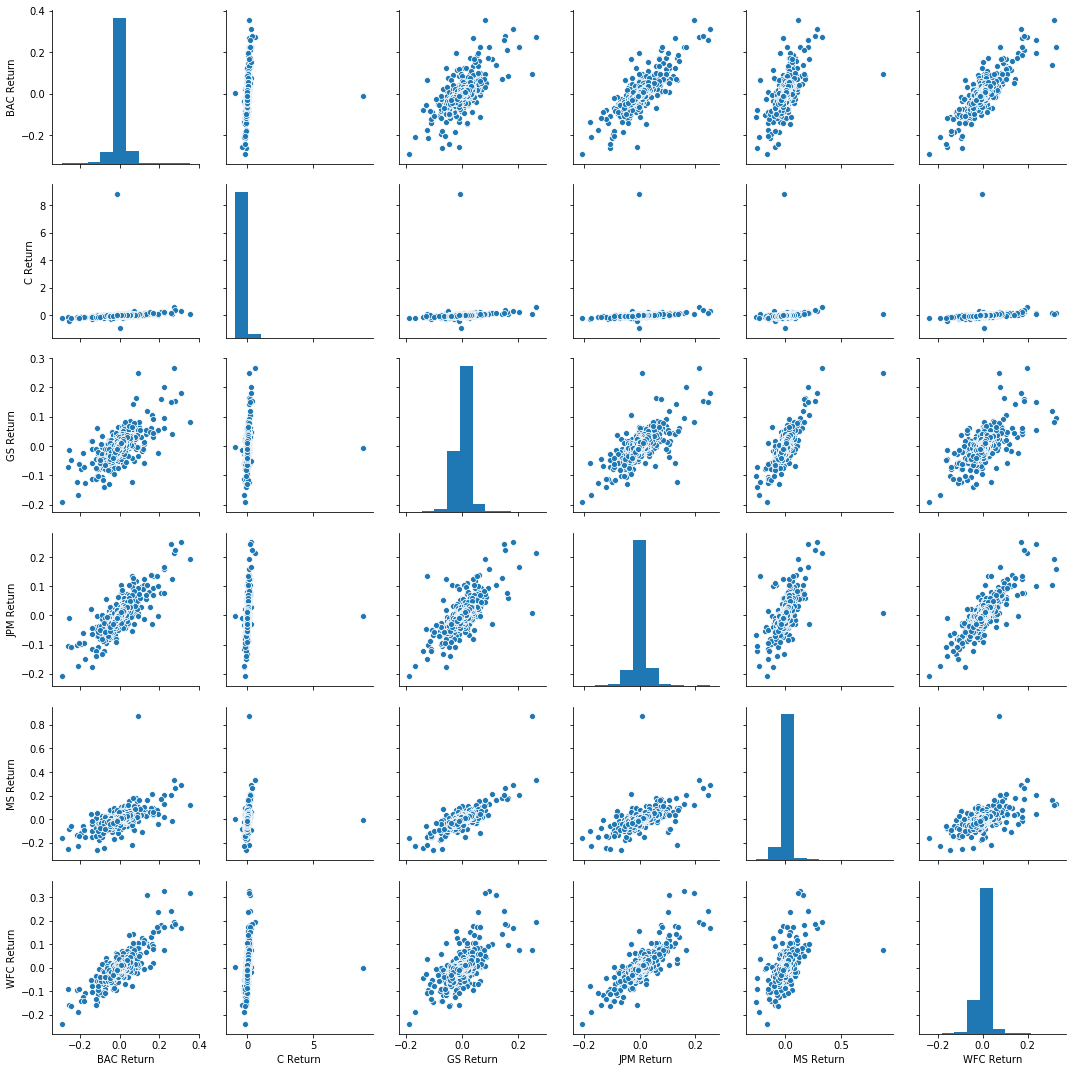

In [14]:
#** Create a pairplot using seaborn of the returns dataframe. **
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(returns[1:])

In [15]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [17]:
#Riskiest?
returns.std() # Citigroup riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [18]:
#Riskiest from 2015?
returns.ix['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

/Users/Jinspire/anaconda2/envs/mypython3version/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/Users/Jinspire/anaconda2/envs/mypython3version/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/Jinspire/anaconda2/envs/mypython3version/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


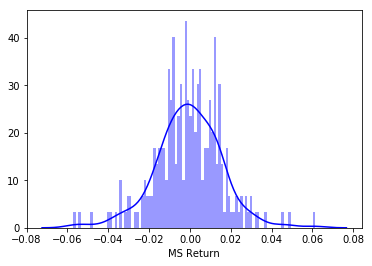

In [19]:
#** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='blue',bins=100)

/Users/Jinspire/anaconda2/envs/mypython3version/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


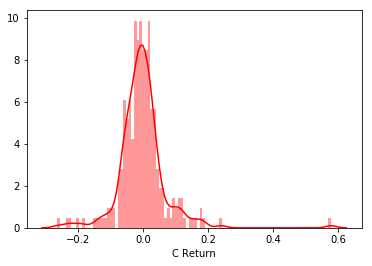

In [20]:
#** Create a distplot using seaborn of the 2008 returns for CitiGroup **
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

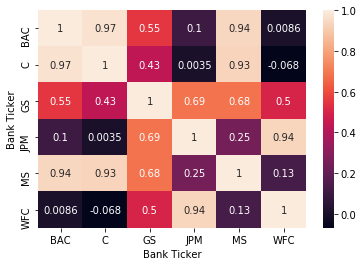

In [22]:
#** Create a heatmap of the correlation between the stocks Close Price.**
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

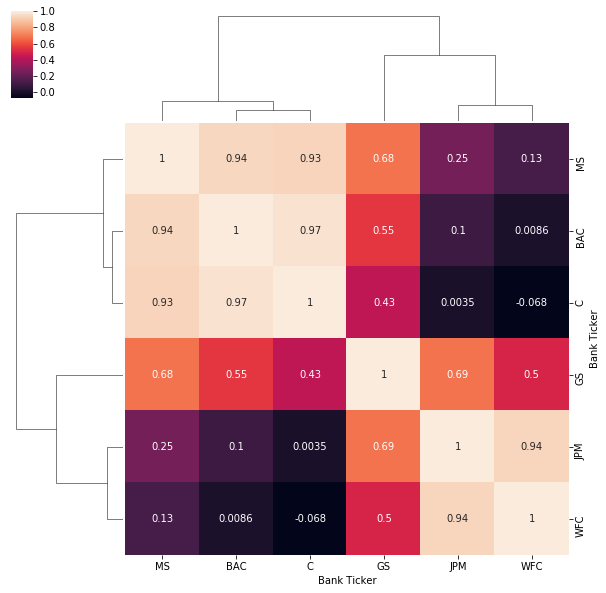

In [23]:
#** Use seaborn's clustermap to cluster the correlations together:**
sns.clustermap(df.xs(key='Close',axis=1, level='Stock Info').corr(),annot=True)